# Momentum Trading Algoritem

A basic momentum model to trade on momentum shifts in between the previous 9 and 21 days. 

In [8]:
import numpy as np 
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt



Downloading data from Yahoo finance:

In [35]:
gld = yf.download('GLD', start='2020-01-01', end='2023-01-01')

day = np.arange(len(gld))
gld['day'] = day

gld.drop(columns=['Volume'], inplace=True)
gld = gld[['day', 'Open', 'High', 'Low', 'Close']]

gld.head()

C:\Users\Jpjha\AppData\Local\Temp\ipykernel_28556\4243491744.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  gld = yf.download('GLD', start='2020-01-01', end='2023-01-01')
[*********************100%***********************]  1 of 1 completed


Price,day,Open,High,Low,Close
Ticker,,GLD,GLD,GLD,GLD
Date,,,,,
2020-01-02,0,143.860001,144.210007,143.399994,143.949997
2020-01-03,1,145.750000,146.320007,145.399994,145.860001
2020-01-06,2,148.440002,148.479996,146.949997,147.389999
2020-01-07,3,147.570007,148.139999,147.429993,147.970001
2020-01-08,4,148.490005,148.610001,146.139999,146.860001


**Adding moving averages to the data**

In [36]:
gld['9-day MA'] = gld['Close'].rolling(9).mean().shift()
gld['21-day MA'] = gld['Close'].rolling(21).mean().shift()
gld['50-day MA'] = gld['Close'].rolling(50).mean().shift()
gld[19:25]


Price,day,Open,High,Low,Close,9-day MA,21-day MA,50-day MA
Ticker,,GLD,GLD,GLD,GLD,,,
Date,,,,,,,,
2020-01-30,19,148.690002,149.309998,148.009995,148.470001,147.403334,NaN,NaN
2020-01-31,20,148.880005,149.679993,148.809998,149.330002,147.643334,NaN,NaN
2020-02-03,21,148.660004,148.779999,147.679993,148.360001,147.948890,147.021429,NaN
2020-02-04,22,146.970001,147.029999,145.800003,146.429993,148.128889,147.231429,NaN
2020-02-05,23,146.380005,146.809998,146.160004,146.610001,148.088889,147.258572,NaN
2020-02-06,24,147.279999,147.630005,147.000000,147.399994,148.032223,147.221429,NaN


**Adding a signal to the data**

The signal displayes 1 for long or -1 for short

In [43]:
gld['Signal'] = np.where(gld['9-day MA'] > gld['21-day MA'], 1, 
						 np.where(gld['9-day MA'] < gld['21-day MA'], -1, 0))

gld.dropna(inplace=True)

gld

Price,day,Open,High,Low,Close,9-day MA,21-day MA,50-day MA,Signal
Ticker,,GLD,GLD,GLD,GLD,,,,
Date,,,,,,,,,
2020-03-16,50,137.559998,142.960007,136.119995,141.639999,153.375554,152.500476,149.398400,1
2020-03-17,51,140.179993,146.199997,139.929993,143.559998,152.014443,152.179523,149.352200,-1
2020-03-18,52,141.750000,142.880005,138.500000,140.699997,150.836665,151.920476,149.306200,-1
2020-03-19,53,139.080002,140.500000,137.850006,138.039993,148.971108,151.434285,149.172400,-1
2020-03-20,54,140.710007,141.169998,139.139999,140.110001,146.803329,150.779523,148.973799,-1
...,...,...,...,...,...,...,...,...,...
2022-12-23,751,166.880005,167.800003,166.660004,167.259995,167.265555,165.969046,160.849199,1
2022-12-27,752,167.889999,170.610001,167.800003,168.669998,167.441111,166.168094,161.096199,1


In [ ]:
gld['return'] = np.log(gld['Close']).diff()
gld['strategy_return'] = gld['Signal'] * gld['return']
gld['entry'] = gld['Signal'].diff()

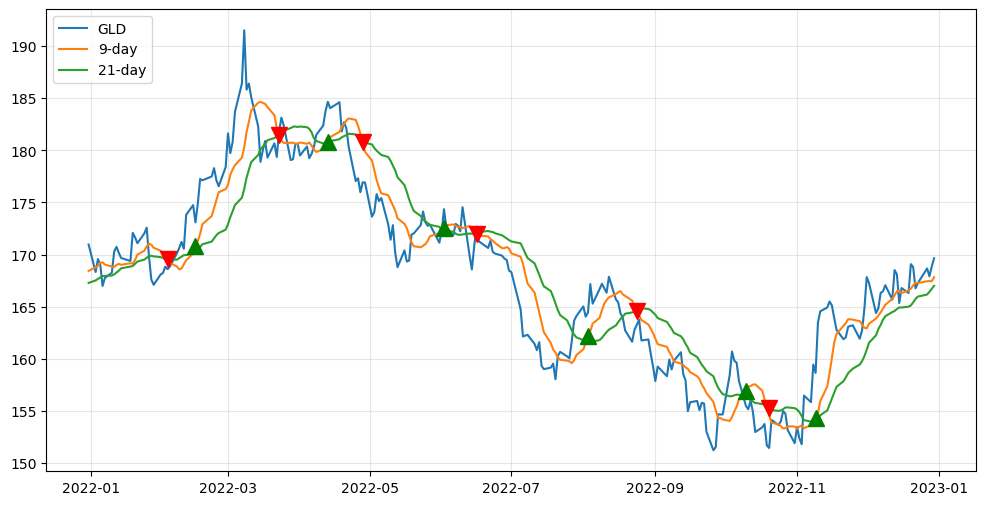

In [48]:
plt.rcParams['figure.figsize'] = 12, 6
plt.grid(True, alpha = .3)
plt.plot(gld.iloc[-252:]['Close'], label = 'GLD')
plt.plot(gld.iloc[-252:]['9-day MA'], label = '9-day')
plt.plot(gld.iloc[-252:]['21-day MA'], label = '21-day')
plt.plot(gld[-252:].loc[gld.entry == 2].index, gld[-252:]['9-day MA'][gld.entry == 2], '^',
         color = 'g', markersize = 12)
plt.plot(gld[-252:].loc[gld.entry == -2].index, gld[-252:]['21-day MA'][gld.entry == -2], 'v',
         color = 'r', markersize = 12)
plt.legend(loc=2);

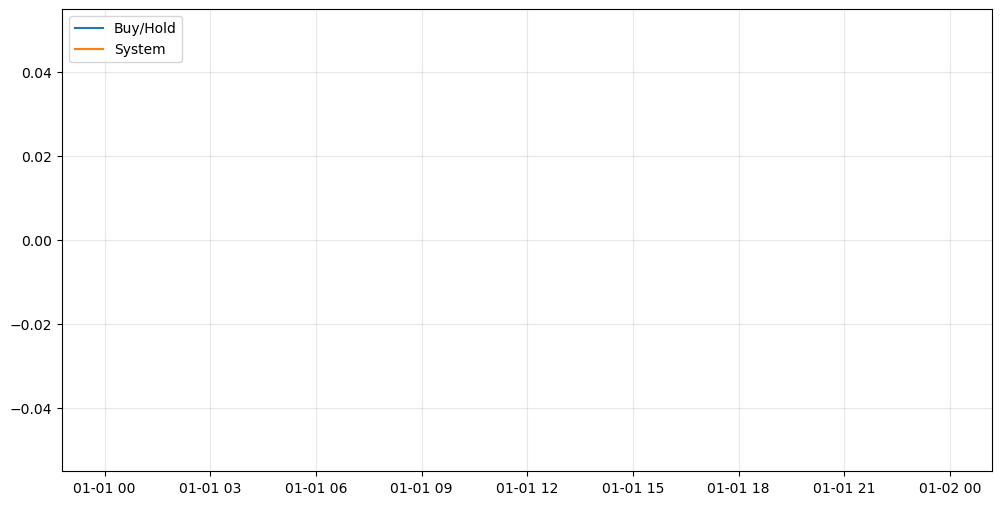

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 706 entries, 2020-03-16 to 2022-12-30
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   (day, )              706 non-null    int32  
 1   (Open, GLD)          706 non-null    float64
 2   (High, GLD)          706 non-null    float64
 3   (Low, GLD)           706 non-null    float64
 4   (Close, GLD)         706 non-null    float64
 5   (9-day MA, )         706 non-null    float64
 6   (21-day MA, )        706 non-null    float64
 7   (50-day MA, )        706 non-null    float64
 8   (Signal, )           706 non-null    int32  
 9   (return, )           0 non-null      float64
 10  (strategy_return, )  0 non-null      float64
 11  (entry, )            705 non-null    float64
dtypes: float64(10), int32(2)
memory usage: 82.4 KB


In [53]:
plt.figure(figsize=(12,6))
plt.plot(np.exp(gld['return']).cumprod(), label='Buy/Hold')
plt.plot(np.exp(gld['strategy_return']).cumprod(), label='System')
plt.legend(loc=2)
plt.grid(True, alpha=.3)
plt.show()

gld.info()